# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [272]:
sinasc_raw = pd.read_csv('SINASC_RO_2019 .csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [273]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [13]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [274]:
sinasc_raw[['munResAlt']].median()

munResAlt    153.0
dtype: float64

In [275]:
sinasc_raw[['QTDFILMORT']].value_counts()

QTDFILMORT
0.0           19672
1.0            4236
2.0             789
3.0             170
4.0              38
5.0              13
6.0               7
9.0               2
7.0               1
8.0               1
28.0              1
dtype: int64

In [276]:
sinasc_raw[['PESO']]

,PESO
0,3685
1,3055
2,3460
3,2982
4,3310
...,...
27023,2110
27024,3310
27025,3065
27026,2352


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
sinasc_2 = sinasc_raw[['SEMAGESTAC', 'PESO', 'munResLat']]


In [277]:
def acima(df, n = 10, column = 'munResLat'):
    return df.dropna().sort_values(by = column, ascending = True)[:5]
acima(sinasc_2)

,SEMAGESTAC,PESO,munResLat
25331,38.0,3010,-13.49976
25490,40.0,3725,-13.49976
11994,40.0,3350,-13.49976
11985,39.0,2935,-13.49976
12223,40.0,3280,-13.49976


In [278]:
def abaixo(df, n = 10, column = 'munResLat'):
    return df.dropna().sort_values(by = column, ascending = False)[:5]
abaixo(sinasc_2)

,SEMAGESTAC,PESO,munResLat
23119,39.0,3415,-8.76889
9693,40.0,3435,-8.76889
9682,40.0,3535,-8.76889
9683,39.0,2940,-8.76889
9684,39.0,3520,-8.76889


In [279]:
df_acima = sinasc_2[sinasc_2['munResLat'] > -10.5]
df_acima.groupby(['munResLat']).aggregate(['sum', np.mean, 'min', max, 'median', 'std'])

SEMAGESTAC                                              PESO  \
                 sum       mean   min   max median       std       sum   
munResLat                                                                
-10.43595    33674.0  38.616972  27.0  44.0   39.0  1.673069   2887629   
-10.43105     3044.0  39.025641  35.0  42.0   39.0  1.511638    271668   
-10.41177    15582.0  38.569307  25.0  42.0   39.0  1.993201   1403504   
-10.33887     2770.0  38.472222  33.0  42.0   39.0  1.635626    242427   
-10.26310     7643.0  38.601010  32.0  42.0   39.0  1.540452    640195   
-10.24873     3711.0  38.656250  32.0  41.0   39.0  1.653246    313103   
-10.20981    22429.0  38.604131  31.0  44.0   39.0  1.905957   1883018   
-9.90846     66579.0  38.641323  22.0  43.0   39.0  1.811747   5621606   
-9.85139      3594.0  38.645161  33.0  43.0   39.0  1.612756    299814   
-9.71667      8660.0  38.488889  26.0  42.0   39.0  1.820300    727261   
-9.70554      1895.0  37.900000  31.0  41.0   38.0  1.798525    160138   
-9.42556     19149.0  38.606855  23.0  44.0   39.0  2.598499   1598684   
-9.37819      7843.0  38.635468  27.0  45.0   39.0  2.081299    674910   
-9.19187      4154.0  38.822430  33.0  43.0   39.0  1.618368    360663   
-8.78502     12277.0  38.851266  25.0  44.0   39.0  1.928903   1110855   
-8.76889    298947.0  38.558880  21.0  45.0   39.0  2.106166  27359673   

                                                        
                  mean   min   max  median         std  
munResLat                                               
-10.43595  3277.671964   404  5190  3260.0  512.786149  
-10.43105  3353.925926  1393  4750  3310.0  523.281420  
-10.41177  3248.851852   730  4700  3280.0  528.387580  
-10.33887  3232.360000  1980  4190  3260.0  451.169880  
-10.26310  3217.060302  1238  4300  3250.0  501.162020  
-10.24873  3227.865979  1455  4785  3230.0  551.587701  
-10.20981  3229.876501   345  4645  3240.0  513.445137  
-9.90846   3251.362637   345  4985  3275.0  501.498389  
-9.85139   3223.806452   845  4395  3230.0  556.245806  
-9.71667   3217.969027   750  4450  3255.0  494.275446  
-9.70554   3202.760000   990  4505  3315.0  677.700179  
-9.42556   3197.368000   500  5065  3250.0  599.736182  
-9.37819   3292.243902  1245  4630  3300.0  476.634802  
-9.19187   3308.834862  2160  4160  3295.0  421.143077  
-8.78502   3296.305638  1180  5135  3325.0  551.831683  
-8.76889   3242.820078   295  5060  3280.0  579.325149

In [280]:
df_abaixo = sinasc_2.groupby('munResLat').apply(abaixo)
df_abaixo = sinasc_2[sinasc_2['munResLat'] < -10.5]
df_abaixo.groupby(['munResLat']).aggregate(['sum', np.mean, 'min', max, 'median', 'std'])

SEMAGESTAC                                             PESO  \
                 sum       mean   min   max median       std      sum   
munResLat                                                               
-13.49976     3112.0  38.900000  35.0  42.0   39.0  1.374266   266888   
-13.47656     1520.0  38.974359  32.0  41.0   39.0  1.798935   133614   
-13.19503     9018.0  38.538462  22.0  44.0   39.0  2.290261   750903   
-13.13056     8279.0  38.686916  26.0  42.0   39.0  1.843684   691626   
-12.99752     4961.0  39.062992  29.0  42.0   39.0  1.660694   418425   
-12.74137    61417.0  38.700063  22.0  44.0   39.0  1.901289  5136098   
-12.55684     6089.0  38.783439  29.0  44.0   39.0  1.718372   537422   
-12.43601     8580.0  38.475336  21.0  45.0   39.0  2.792860   757185   
-12.17983     1628.0  37.860465  32.0  42.0   38.0  2.088305   136240   
-12.13178     5938.0  38.558442  30.0  42.0   39.0  1.711121   502253   
-12.06380    11597.0  38.785953  24.0  45.0   39.0  1.949274   998556   
-11.93554    13968.0  38.585635  27.0  43.0   39.0  1.865153  1189389   
-11.91439     2018.0  38.075472  27.0  43.0   39.0  2.887966   167755   
-11.90842     3767.0  38.438776  32.0  42.0   39.0  1.566836   318147   
-11.82571     1633.0  37.976744  21.0  42.0   38.0  3.173464   136980   
-11.76712     6092.0  38.556962  19.0  44.0   39.0  2.419385   552576   
-11.72226    34995.0  38.413831  21.0  44.0   39.0  1.850746  2988134   
-11.72133     9923.0  38.461240  25.0  43.0   39.0  2.061423   818185   
-11.70974     3786.0  38.632653  28.0  45.0   39.0  1.874340   317985   
-11.69949    13385.0  38.462644  25.0  44.0   39.0  1.941889  1121830   
-11.67754    23573.0  38.644262  27.0  44.0   39.0  1.818445  2036145   
-11.52855    15801.0  38.633252  22.0  45.0   39.0  2.070443  1465785   
-11.43387    52732.0  38.434402  21.0  44.0   39.0  1.933070  4465116   
-11.42684     1230.0  38.437500  34.0  41.0   39.0  1.389767   102602   
-11.34413     7531.0  38.620513  33.0  43.0   39.0  1.569552   661271   
-11.19624     3193.0  38.011905  32.0  45.0   38.0  1.839945   263390   
-11.17321    11313.0  38.219595  24.0  44.0   39.0  2.166561   964612   
-11.12855     6095.0  38.333333  27.0  45.0   38.0  2.002109   542460   
-11.04561     6055.0  38.322785  27.0  44.0   39.0  2.255267   516204   
-10.93217     2351.0  38.540984  34.0  43.0   38.0  1.821847   203856   
-10.91553     3913.0  38.362745  33.0  42.0   38.0  1.355511   332095   
-10.88205    75397.0  38.665128  19.0  45.0   39.0  2.174332  7098217   
-10.77388    27431.0  38.365035  22.0  42.0   39.0  2.347215  2571907   
-10.72357    23763.0  38.451456  29.0  44.0   39.0  1.785519  2036133   
-10.61207     4240.0  38.545455  32.0  42.0   39.0  1.589163   362767   
-10.56842     6341.0  38.430303  28.0  44.0   39.0  2.036928   535843   

                                                        
                  mean   min   max  median         std  
munResLat                                               
-13.49976  3336.100000  2235  4375  3355.0  467.950517  
-13.47656  3340.350000  2550  4215  3368.0  428.847265  
-13.19503  3168.367089   355  4790  3260.0  629.609258  
-13.13056  3231.897196   258  4888  3307.5  611.879287  
-12.99752  3294.685039   790  4810  3280.0  572.916262  
-12.74137  3230.250314   425  4920  3272.0  554.485749  
-12.55684  3317.419753   990  4415  3347.5  493.771538  
-12.43601  3249.721030   425  4570  3270.0  586.262971  
-12.17983  3096.363636  1790  4160  3110.0  516.257061  
-12.13178  3261.383117  1335  4430  3262.5  486.031350  
-12.06380  3295.564356   560  4760  3340.0  468.512457  
-11.93554  3240.841962   370  4980  3270.0  544.368484  
-11.91439  3106.574074   810  4370  3127.5  646.111609  
-11.90842  3213.606061  1640  4180  3250.0  461.650473  
-11.82571  3185.581395   320  4235  3290.0  744.593377  
-11.76712  3289.142857  1140  4700  3337.5  513.136770  
-11.72226  3223.445523   690  5720  3260.0  520.035220  
-11.72133  3134.808429

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [281]:
sinasc_3 = sinasc_raw[['QTDPARTNOR', 'QTDPARTCES', 'munResArea']]
df_area_maior = sinasc_3[sinasc_3['munResArea'] > 3000]
df_area_maior

,QTDPARTNOR,QTDPARTCES,munResArea
0,0.0,0.0,7067.025
1,0.0,1.0,7067.025
2,1.0,1.0,7067.025
3,0.0,0.0,3958.273
4,0.0,1.0,7067.025
...,...,...,...
27022,0.0,0.0,11518.915
27023,1.0,0.0,11518.915
27024,0.0,0.0,5126.723
27025,0.0,0.0,11518.915


In [282]:
df_area_maior.groupby(['munResArea']).aggregate(['sum', np.mean, 'min', max, 'median', 'std'])

QTDPARTNOR                                       QTDPARTCES  \
                  sum      mean  min   max median       std        sum   
munResArea                                                               
3029.189        113.0  0.559406  0.0   9.0    0.0  1.136870       88.0   
3060.321         45.0  0.357143  0.0   4.0    0.0  0.794625       61.0   
3135.106         63.0  0.677419  0.0   7.0    0.0  1.226175       48.0   
3265.809        210.0  0.864198  0.0   9.0    1.0  1.213762      330.0   
3442.005        110.0  1.047619  0.0  41.0    0.0  4.088871       86.0   
3773.505         66.0  0.395210  0.0   5.0    0.0  0.775825       89.0   
3792.998        524.0  0.383602  0.0   7.0    0.0  0.920659      722.0   
3863.943        143.0  0.715000  0.0   7.0    0.0  1.183545      113.0   
3958.273         43.0  0.284768  0.0   4.0    0.0  0.724592       92.0   
4081.583        104.0  1.019608  0.0   6.0    0.0  1.469023       45.0   
4426.571        806.0  0.468060  0.0   8.0    0.0  0.979376      922.0   
4518.035        265.0  0.595506  0.0  40.0    0.0  2.157739      416.0   
4987.177        185.0  0.804348  0.0  14.0    0.0  1.805131      104.0   
5067.384         37.0  0.342593  0.0   5.0    0.0  0.750850       49.0   
5126.723         62.0  0.400000  0.0   6.0    0.0  0.943880       95.0   
6014.733         30.0  0.750000  0.0   5.0    0.0  1.334935       16.0   
6240.932        181.0  0.296721  0.0   9.0    0.0  0.772361      361.0   
6843.868        308.0  1.037037  0.0  10.0    1.0  1.525230      139.0   
6896.648       1021.0  0.470507  0.0   7.0    0.0  0.927181     1040.0   
7067.025        146.0  0.401099  0.0   7.0    0.0  0.926261      176.0   
7460.219        116.0  0.329545  0.0   4.0    0.0  0.765668      211.0   
8509.270        379.0  0.764113  0.0  10.0    0.0  1.294433      201.0   
10071.643       350.0  0.911458  0.0   8.0    0.0  1.400289      180.0   
10959.767       167.0  0.551155  0.0   6.0    0.0  1.108303      164.0   
11518.915       522.0  0.329338  0.0   9.0    0.0  0.840907      938.0   
24855.724       947.0  1.233073  0.0  10.0    1.0  1.744905      273.0   
34096.394      5716.0  0.792238  0.0  40.0    0.0  1.373921     3225.0   

                                                  
                mean  min   max median       std  
munResArea                                        
3029.189    0.435644  0.0   3.0    0.0  0.711188  
3060.321    0.484127  0.0   3.0    0.0  0.689743  
3135.106    0.516129  0.0   2.0    0.0  0.716466  
3265.809    1.012270  0.0   4.0    1.0  0.727379  
3442.005    0.693548  0.0   2.0    1.0  0.664763  
3773.505    0.529762  0.0   3.0    0.0  0.716993  
3792.998    0.528551  0.0   4.0    0.0  0.717335  
3863.943    0.562189  0.0   4.0    0.0  0.766396  
3958.273    0.605263  0.0   2.0    0.0  0.747250  
4081.583    0.445545  0.0   3.0    0.0  0.741286  
4426.571    0.535735  0.0   4.0    0.0  0.739285  
4518.035    0.934831  0.0   4.0    1.0  0.679676  
4987.177    0.458150  0.0   3.0    0.0  0.723660  
5067.384    0.453704  0.0   2.0    0.0  0.586200  
5126.723    0.612903  0.0   4.0    0.0  0.824834  
6014.733    0.400000  0.0   2.0    0.0  0.632456  
6240.932    0.592775  0.0   4.0    0.0  0.737849  
6843.868    0.464883  0.0   4.0    0.0  0.742708  
6896.648    0.478821  0.0  12.0    0.0  0.799593  
7067.025    0.482192  0.0   3.0    0.0  0.720833  
7460.219    0.599432  0.0   4.0    0.0  0.744438  
8509.270    0.406061  0.0   3.0    0.0  0.684386  
10071.643   0.466321  0.0   3.0    0.0  0.728033  
10959.767   0.544850  0.0   3.0    0.0  0.758605  
11518.915   0.591798  0.0   4.0    0.0  0.754152  
24855.724   0.355469  0.0   3.0    0.0  0.653899  
34096.394   0.448103  0.0  12.0    0.0  0.735605

In [283]:
df_area_menor = sinasc_3[sinasc_3['munResArea'] < 3000]
df_area_menor

,QTDPARTNOR,QTDPARTCES,munResArea
6,0.0,1.0,843.446
21,0.0,0.0,1457.888
43,0.0,0.0,541.647
75,0.0,0.0,2651.822
77,0.0,2.0,1931.378
...,...,...,...
26990,0.0,1.0,1457.888
26997,0.0,0.0,1969.850
27003,0.0,1.0,1451.060
27021,0.0,1.0,1451.060


In [113]:
df_area_menor.groupby(['munResArea']).aggregate(['sum', np.mean, 'min', max, 'median', 'std'])

QTDPARTNOR                                       QTDPARTCES  \
                  sum      mean  min   max median       std        sum   
munResArea                                                               
459.978          14.0  0.218750  0.0   6.0    0.0  0.844567       42.0   
541.647          15.0  0.277778  0.0   5.0    0.0  0.810699       26.0   
605.692          16.0  0.372093  0.0   2.0    0.0  0.618110       33.0   
798.083          44.0  0.530120  0.0   6.0    0.0  1.085799       50.0   
807.126          41.0  0.398058  0.0   4.0    0.0  0.855659       48.0   
831.857          65.0  0.393939  0.0   5.0    0.0  0.770627       96.0   
843.446          24.0  0.244898  0.0   3.0    0.0  0.643143       60.0   
892.842          17.0  0.531250  0.0   6.0    0.0  1.269604       18.0   
965.676          31.0  0.392405  0.0   4.0    0.0  0.853616       28.0   
1191.875         72.0  0.441718  0.0   5.0    0.0  0.817238       92.0   
1197.796         26.0  0.262626  0.0   4.0    0.0  0.708345       66.0   
1314.352         18.0  0.225000  0.0   3.0    0.0  0.655551       43.0   
1451.060         95.0  0.443925  0.0   8.0    0.0  1.027388      110.0   
1457.888        247.0  0.268770  0.0  10.0    0.0  0.795284      567.0   
1703.008         67.0  0.259690  0.0   3.0    0.0  0.622536      169.0   
1717.640         37.0  0.770833  0.0   4.0    0.0  1.171280       29.0   
1758.465        125.0  0.415282  0.0   7.0    0.0  0.881457      159.0   
1931.378         82.0  0.440860  0.0   6.0    0.0  0.974955      113.0   
1961.778         31.0  0.436620  0.0   7.0    0.0  1.091950       38.0   
1969.850        241.0  0.384370  0.0   6.0    0.0  0.831073      339.0   
2197.413         38.0  0.400000  0.0   3.0    0.0  0.790906       50.0   
2548.683         19.0  0.441860  0.0   5.0    0.0  1.007173       36.0   
2651.822        122.0  0.557078  0.0   6.0    0.0  1.027236      136.0   
2783.300         74.0  0.318966  0.0   8.0    0.0  0.888592      160.0   
2944.128        351.0  0.402062  0.0   7.0    0.0  0.844489      444.0   

                                                 
                mean  min  max median       std  
munResArea                                       
459.978     0.656250  0.0  3.0    0.0  0.801165  
541.647     0.481481  0.0  3.0    0.0  0.665618  
605.692     0.767442  0.0  3.0    1.0  0.750784  
798.083     0.602410  0.0  4.0    0.0  0.854540  
807.126     0.466019  0.0  3.0    0.0  0.683353  
831.857     0.578313  0.0  4.0    0.0  0.756715  
843.446     0.612245  0.0  3.0    0.0  0.712664  
892.842     0.562500  0.0  3.0    0.0  0.840027  
965.676     0.354430  0.0  2.0    0.0  0.599957  
1191.875    0.564417  0.0  3.0    0.0  0.770095  
1197.796    0.666667  0.0  4.0    1.0  0.782461  
1314.352    0.537500  0.0  3.0    0.0  0.762138  
1451.060    0.516432  0.0  3.0    0.0  0.730703  
1457.888    0.618321  0.0  4.0    0.0  0.770932  
1703.008    0.655039  0.0  3.0    1.0  0.749315  
1717.640    0.604167  0.0  3.0    0.0  0.843992  
1758.465    0.530000  0.0  3.0    0.0  0.781753  
1931.378    0.591623  0.0  3.0    0.0  0.788558  
1961.778    0.527778  0.0  2.0    0.0  0.691441  
1969.850    0.540670  0.0  5.0    0.0  0.734491  
2197.413    0.526316  0.0  2.0    0.0  0.712235  
2548.683    0.857143  0.0  3.0    1.0  0.813647  
2651.822    0.621005  0.0  3.0    0.0  0.758872  
2783.300    0.686695  0.0  3.0    0.0  0.804429  
2944.128    0.508591  0.0  4.0    0.0  0.692510

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [284]:
sinasc_raw[['munResAlt']].mean()

munResAlt    179.111999
dtype: float64

In [150]:
sinasc_4 = sinasc_raw[['APGAR1', 'APGAR5', 'munResAlt']]
df_above = sinasc_4[sinasc_4['munResAlt'] > 180]
df_above.groupby(['munResAlt']).aggregate(['sum', np.mean, 'min', max, 'median', 'std'])

APGAR1                                         APGAR5            \
               sum      mean  min   max median       std      sum      mean   
munResAlt                                                                     
182.0       1628.0  7.941463  3.0  10.0    8.0  0.921682   1871.0  9.126829   
186.0       6243.0  7.963010  2.0  10.0    8.0  0.911069   7158.0  9.130102   
191.0       3288.0  7.884892  0.0  10.0    8.0  0.866684   3886.0  9.318945   
192.0        780.0  8.041237  6.0  10.0    8.0  0.454549    879.0  9.061856   
197.0       1369.0  8.246988  3.0  10.0    8.0  0.968828   1549.0  9.331325   
202.0        902.0  8.053571  5.0  10.0    8.0  0.582620   1018.0  9.089286   
206.0       1381.0  8.319277  2.0   9.0    9.0  1.201207   1576.0  9.493976   
212.0       1314.0  8.012195  2.0  10.0    8.0  1.044928   1526.0  9.304878   
215.0        256.0  8.000000  3.0   9.0    8.0  1.077632    289.0  9.031250   
227.0       7497.0  8.096112  1.0  10.0    8.0  0.975620   8424.0  9.097192   
230.0        798.0  8.142857  3.0   9.0    8.0  0.963242    896.0  9.142857   
236.0        659.0  8.237500  5.0  10.0    8.0  0.799426    730.0  9.125000   
241.0        809.0  7.778846  1.0  10.0    8.0  1.400116    952.0  9.153846   
245.0        336.0  7.813953  2.0   9.0    8.0  1.258416    385.0  8.953488   
252.0       5230.0  8.301587  3.0  10.0    8.0  0.960838   5824.0  9.259141   
259.0       1982.0  7.593870  0.0   9.0    8.0  1.197674   2293.0  8.785441   
263.0       5448.0  7.964912  1.0  10.0    8.0  0.991293   6179.0  9.046852   
265.0        780.0  7.878788  0.0   9.0    8.0  1.458772    897.0  9.060606   
266.0        677.0  8.059524  4.0   9.0    8.0  0.935913    770.0  9.166667   
269.0       1048.0  8.251969  3.0  10.0    8.0  0.825857   1172.0  9.228346   
270.0        441.0  8.166667  4.0  10.0    8.0  1.145129    507.0  9.388889   
296.0        354.0  8.045455  4.0  10.0    8.0  0.888022    399.0  9.068182   
338.0       3002.0  8.202186  2.0  10.0    8.0  0.886795   3391.0  9.239782   
340.0       1310.0  8.187500  5.0  10.0    8.0  0.710987   1449.0  9.056250   
397.0       1266.0  8.220779  3.0  10.0    8.0  0.872580   1405.0  9.123377   
419.0       1739.0  8.126168  0.0   9.0    8.0  0.876381   1935.0  9.042056   
595.0      13058.0  8.238486  0.0  10.0    8.0  0.838564  14397.0  9.089015   

                                       
           min   max median       std  
munResAlt                              
182.0      3.0  10.0    9.0  0.882017  
186.0      0.0  10.0    9.0  0.834084  
191.0      0.0  10.0    9.0  0.915387  
192.0      8.0  10.0    9.0  0.376786  
197.0      6.0  10.0    9.0  0.741731  
202.0      6.0  10.0    9.0  0.562388  
206.0      4.0  10.0   10.0  0.858095  
212.0      5.0  10.0    9.0  0.839062  
215.0      5.0  10.0    9.0  0.822442  
227.0      1.0  10.0    9.0  0.774773  
230.0      8.0  10.0    9.0  0.625901  
236.0      8.0  10.0    9.0  0.487177  
241.0      1.0  10.0    9.0  1.212950  
245.0      0.0  10.0    9.0  1.511125  
252.0      4.0  10.0    9.0  0.828205  
259.0      0.0  10.0    9.0  1.153564  
263.0      0.0  10.0    9.0  0.953848  
265.0      7.0  10.0    9.0  0.667285  
266.0      7.0  10.0    9.0  0.691312  
269.0      7.0  10.0    9.0  0.537321  
270.0      8.0  10.0    9.0  0.626962  
296.0      8.0  10.0    9.0  0.586584  
338.0      0.0  10.0    9.0  0.936362  
340.0      1.0  10.0    9.0  0.810675  
397.0      1.0  10.0    9.0  0.888032  
419.0      7.0  10.0    9.0  0.524613  
595.0      1.0  10.0    9.0  0.635071

In [151]:
df_below = sinasc_4[sinasc_4['munResAlt'] < 180]
df_below.groupby(['munResAlt']).aggregate(['sum', np.mean, 'min', max, 'median', 'std'])

APGAR1                                         APGAR5            \
               sum      mean  min   max median       std      sum      mean   
munResAlt                                                                     
85.0        2743.0  8.262048  3.0  10.0    8.0  0.869423   3076.0  9.265060   
87.0       69355.0  8.271318  0.0  10.0    8.0  0.939089  77245.0  9.212284   
99.0         885.0  8.194444  1.0  10.0    8.0  1.063044   1000.0  9.259259   
111.0       1627.0  7.936585  1.0  10.0    8.0  1.213033   1877.0  9.156098   
124.0        400.0  8.000000  1.0  10.0    8.0  1.385051    461.0  9.220000   
128.0       1835.0  8.119469  2.0  10.0    8.0  1.090921   2101.0  9.296460   
133.0       6303.0  8.217731  0.0  10.0    8.0  0.923043   7117.0  9.279009   
139.0      13827.0  7.997108  0.0  10.0    8.0  1.179735  15894.0  9.192597   
144.0       3860.0  7.766600  1.0  10.0    8.0  1.225506   4414.0  8.917172   
145.0       1789.0  7.711207  2.0  10.0    8.0  1.168954   2090.0  9.008621   
151.0       3555.0  8.248260  0.0  10.0    8.0  0.876616   4038.0  9.368910   
153.0       4972.0  8.528302  0.0  10.0    9.0  1.070763   5654.0  9.714777   
154.0        677.0  8.358025  5.0  10.0    8.0  0.826266    751.0  9.271605   
155.0       1597.0  8.025126  0.0  10.0    8.0  1.394206   1856.0  9.326633   
157.0      17436.0  7.990834  0.0  10.0    8.0  0.977467  19879.0  9.114626   
158.0        752.0  8.086022  2.0  10.0    8.0  0.855366    832.0  8.946237   
161.0        599.0  7.986667  4.0  10.0    8.0  1.108851    684.0  9.120000   
163.0       7095.0  8.062500  1.0  10.0    8.0  0.780568   7984.0  9.062429   
166.0       2361.0  7.792079  0.0  10.0    8.0  1.250034   2719.0  9.003311   
170.0        327.0  8.175000  5.0   9.0    8.0  0.873763    365.0  9.125000   
177.0      11157.0  8.126001  1.0  10.0    8.0  0.806859  12612.0  9.185725   
178.0       2402.0  7.901316  2.0   9.0    8.0  0.938786   2733.0  9.019802   

                                       
           min   max median       std  
munResAlt                              
85.0       7.0  10.0    9.0  0.593710  
87.0       0.0  10.0    9.0  0.766838  
99.0       6.0  10.0    9.0  0.688631  
111.0      6.0  10.0    9.0  0.782796  
124.0      6.0  10.0    9.0  0.789988  
128.0      5.0  10.0    9.0  0.657055  
133.0      0.0  10.0    9.0  0.809774  
139.0      0.0  10.0    9.0  0.809687  
144.0      1.0  10.0    9.0  0.943338  
145.0      2.0  10.0    9.0  0.980288  
151.0      6.0  10.0    9.0  0.647613  
153.0      1.0  10.0   10.0  0.702409  
154.0      5.0  10.0    9.0  0.774796  
155.0      5.0  10.0    9.0  0.852118  
157.0      1.0  10.0    9.0  0.797169  
158.0      1.0  10.0    9.0  1.046377  
161.0      5.0  10.0    9.0  0.869296  
163.0      1.0  10.0    9.0  0.670453  
166.0      2.0  10.0    9.0  1.009912  
170.0      8.0  10.0    9.0  0.515777  
177.0      3.0  10.0    9.0  0.629475  
178.0      0.0  10.0    9.0  0.805365

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [302]:
idade_mae = sinasc_raw[['IDADEMAE', 'munResNome']]
idade_mae

,IDADEMAE,munResNome
0,19,Alta Floresta D'Oeste
1,29,Alta Floresta D'Oeste
2,37,Alta Floresta D'Oeste
3,30,Alto Alegre dos Parecis
4,30,Alta Floresta D'Oeste
...,...,...
27023,32,Vilhena
27024,19,Chupinguaia
27025,24,Vilhena
27026,21,Vilhena


In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

In [303]:
intermediarias = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [304]:
idade_mae = idade_mae.set_index('munResNome')
idade_mae

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,19
Alta Floresta D'Oeste,29
Alta Floresta D'Oeste,37
Alto Alegre dos Parecis,30
Alta Floresta D'Oeste,30
...,...
Vilhena,32
Chupinguaia,19
Vilhena,24


In [305]:
df_idade = idade_mae.groupby(intermediarias).aggregate([np.mean])
df_idade.columns

MultiIndex([('IDADEMAE', 'mean')],
           )

<AxesSubplot:xlabel='Regiões Imediatas RO', ylabel='Média de Idade MÃE'>

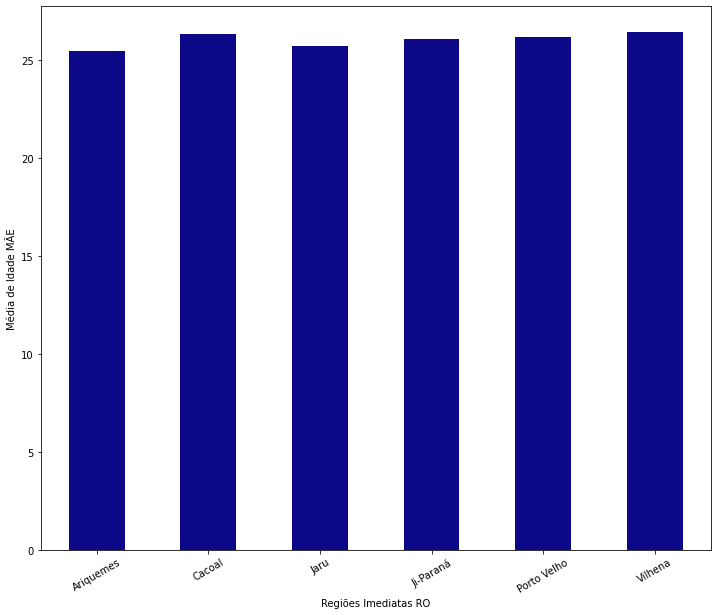

In [309]:
plot_idade = df_idade.plot(kind='bar', stacked=True, figsize=(12,10), xlabel='Regiões Imediatas RO', ylabel='Média de Idade MÃE', legend=False, colormap='plasma', rot=30)
plot_idade

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [320]:
idh_alto = {
    'Porto Velho': 0.736,
    'Vilhena': 0.731,
    'Cacoal': 0.718,
    'Ji-Paraná': 0.714,
    'Pimenta Bueno': 0.710,
    'Ariquemes': 0.702,
    'Rolim de Moura': 0.700
}

idh_medio = {
    'Cerejeiras': 0.692,
    'Jaru': 0.689,
    'Colorado do Oeste': 0.685,
    'Ouro Preto do Oeste': 0.682,
    'Espigão dOeste': 0.682,
    'Santa Luzia dOeste': 0.670,
    'Pimenteiras do Oeste': 0.665,
    'Presidente Médici': 0.664,
    'Castanheiras': 0.658,
    'Guajará-Mirim': 0.657,
    'Chupinguaia': 0.652,
    'Cabixi': 0.650,
    'Candeias do Jamari': 0.649,
    'São Felipe dOeste': 0.649,
    'Cacaulandia': 0.646,
    'São Miguel do Guaporé': 0.646,
    'Mirante da Serra': 0.643,
    'Alvorada dOeste': 0.643,
    'Teixeiropolis': 0.643,
    'Novo Brasilandia dOeste': 0.643,
    'Rio Crespo': 0.643,
    'Primavera de Rondonia': 0.641,
    'Alta Floresta dOeste': 0.641,
    'Ministro Andreazza': 0.638,
    'Novo Horizonte Do Oeste': 0.634,
    'Vale do Paraiso': 0.627,
    'Alto Paraiso': 0.625,
    'Parecis': 0.617,
    'Buritis': 0.616,
    'Itapua do Oeste': 0.614,
    'Corumbiara': 0.613,
    'Cujubim': 0.612,
    'Costa Marques': 0.611,
    'Sao Francisco do Guapore': 0.611,
    'Urupa': 0.609,
    'Monte Negro': 0.607
}

idh_baixo = {
    'Seringueiras': 0.598,
    'Governador Jorge Teixeira': 0.596,
    'Machadinho dOeste': 0.596,
    'Campo Novo de Rondonia': 0.596,
    'Alto Alegre dos Parecis': 0.592,
    'Theobroma': 0.589,
    'Nova Uniao': 0.587,
    'Vale do Anari': 0.584
}

In [358]:
sinasc4 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc4 = sinasc4.set_index('munResNome')

In [368]:
df_idh_baixo = sinasc4.groupby(idh_baixo).agg([np.mean])
df_idh_baixo

,IDADEMAE,IDADEPAI
,mean,mean
munResNome,,
0.584,26.096774,34.000000
0.589,25.536082,30.083333
0.592,24.844156,29.179104
0.596,24.401786,29.222222
0.598,24.910714,30.500000


In [370]:
df_idh_medio = sinasc4.groupby(idh_medio).agg([np.mean])
df_idh_medio

,IDADEMAE,IDADEPAI
,mean,mean
munResNome,,
0.607,25.648241,34.678571
0.611,24.412017,30.613636
0.612,24.482927,31.400000
0.613,24.716535,32.470588
0.616,25.559177,30.812500
0.617,26.454545,32.473684
0.638,27.904762,33.849315
0.643,26.387850,32.105882


In [372]:
df_idh_alto = sinasc4.groupby(idh_alto).agg([np.mean])
df_idh_alto

,IDADEMAE,IDADEPAI
,mean,mean
munResNome,,
0.700,26.600863,30.360479
0.702,25.607866,32.466667
0.710,25.199675,29.745174
0.714,26.361137,31.132239
0.718,26.890102,30.931854
0.731,26.433962,34.152941
0.736,26.312670,32.352679


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [380]:
ifdm = {
    'Ariquemes': 0.7746,
    'Vilhena': 0.7465,
    'Pimenta Bueno': 0.7383,
    'Porto Velho': 0.7257,
    'Ji-Paraná': 0.7117,
    'Cacoal': 0.7111,
    'Santa Luzia dOeste': 0.6850,
    'Rolim de Moura': 0.6785,
    'Vilhena': 0.7465,
    'Ariquemes': 0.7746,
    'Vilhena': 0.7465,
   ' Pimenta Bueno': 0.7383,
    'Porto Velho': 0.7257,
    'Ji-Paraná': 0.7117,
    'Cacoal': 0.7111,
    'Santa Luzia dOeste': 0.685,
    'Rolim de Moura': 0.6785,
    'Chupinguaia': 0.6766,
    'São Miguel do Guaporé': 0.6699,
    'Pimenteiras do Oeste': 0.6501,
    'Teixeirópolis': 0.65,
    'Colorado do Oeste': 0.6473,
    'Jaru': 0.645,
    'Rio Crespo': 0.643,
    'Primavera de Rondônia': 0.6384,
    "Alta Floresta d'Oeste": 0.6337,
    'Ouro Preto do Oeste': 0.6261,
    'São Francisco do Guaporé': 0.6214,
    'Candeias do Jamari': 0.6199,
    'São Felipe dOeste': 0.6153,
    'Presidente Médici': 0.614,
    'Cerejeiras': 0.6137,
    'Monte Negro': 0.6016,
    'Urupá': 0.6006,
    'Espigão dOeste': 0.5973,
    'Seringueiras': 0.5922,
    'Alvorada dOeste': 0.5919,
    'Itapuã do Oeste': 0.5903,
    'Cabixi': 0.5887,
    'Novo Horizonte do Oeste': 0.5858,
    'Nova Brasilândia dOeste': 0.5857,
    'Vale do Paraíso':0.5818,
    'Corumbiara': 0.5759,
    'Alto Paraíso': 0.5735,
    'Cacaulândia': 0.5721,
    'Vale do Anari': 0.571,
    'Ministro Andreazza': 0.5657,
    'Costa Marques': 0.5626,
    'Nova União':0.5571,
    'Guajará-Mirim':0.5541,
    'Mirante da Serra':0.5519,
    'Parecis':0.5502,
    'Castanheiras':0.543,
    'Theobroma':0.5405,
    'Machadinho dOeste':0.5322,
    'Campo Novo de Rondônia': 0.5272,
    'Nova Mamoré': 0.5084,
    'Cujubim': 0.5055,
    'Alto Alegre dos Parecis': 0.5046
    }


In [384]:
df_ifdm = sinasc4.groupby(ifdm).agg([np.mean])
df_ifdm.set_index()

,IDADEMAE,IDADEPAI
,mean,mean
munResNome,,
0.5046,24.844156,29.179104
0.5055,24.482927,31.400000
0.5084,25.326389,31.692308
0.5272,24.825301,30.500000
0.5405,25.536082,30.083333
0.5430,27.281250,30.392857
0.5502,26.454545,32.473684
0.5519,26.304878,32.154762


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.